<a href="https://colab.research.google.com/github/eliezerkapish/Machine-Learning-Projects/blob/main/Image_Recognition_Model_In_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras split-folders opencv-python

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.19.0


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, models


In [ ]:
input_folder = "/content/drive/MyDrive/Agricultural-crops"
output_folder = "/content/drive/MyDrive/ImageRecognition"



In [ ]:
import splitfolders

split_ratio = (0.8, 0.1, 0.1)

splitfolders.ratio(
    input_folder,
    output_folder,
    seed=500,
    ratio=split_ratio,
    group_prefix=None,
)

Copying files: 829 files [06:18,  2.19 files/s]


In [ ]:
# Define the parameters
image_size = (224, 224)
batch_size = 32

train_datagem = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range =0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Define the parameters
img_size = (224, 224)
batch_size = 32

In [ ]:
# Data argumentation for test data (only rescaling)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# Data argumentaion for validation data (only rescaling)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_dir = os.path.join(output_folder, 'train')
val_dir = os.path.join(output_folder, 'val')
test_dir = os.path.join(output_folder, 'test')

train_data = test_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'

)

valid_data = valid_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 652 images belonging to 30 classes.
Found 105 images belonging to 30 classes.
Found 72 images belonging to 30 classes.


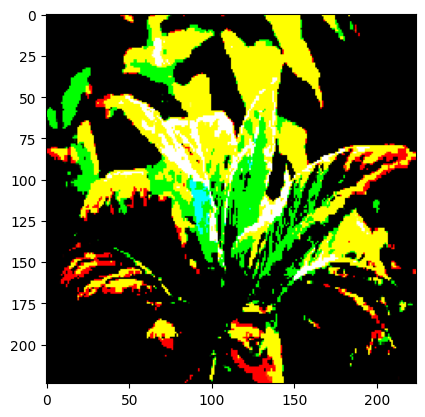

In [ ]:
# Get a batch of images and labels
images, labels = next(train_data)

# Select a random image from the batch
import random
idx = random.randint(0, images.shape[0] - 1)


# Plot the image
plt.imshow(images[idx])
plt.show()

In [ ]:
from keras.applications.resnet50 import ResNet50
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(img_size[0], img_size[1], 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Freeze the convulational base
base_model.trainable = False

In [ ]:
model = models.Sequential([base_model,
layers.GlobalAveragePooling2D(),
layers.Dense(128, activation ='relu'),
layers.Dropout(0.5),
layers.Dense(30, activation="softmax")
])

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
model.fit(train_data, epochs=25, validation_data=valid_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 153s 7s/step - accuracy: 0.0748 - loss: 3.9202 - val_accuracy: 0.4444 - val_loss: 2.5414
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 146s 7s/step - accuracy: 0.3351 - loss: 2.3827 - val_accuracy: 0.5278 - val_loss: 1.7376
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 138s 7s/step - accuracy: 0.4773 - loss: 1.8647 - val_accuracy: 0.7361 - val_loss: 1.3569
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 137s 6s/step - accuracy: 0.6214 - loss: 1.2884 - val_accuracy: 0.7361 - val_loss: 1.0754
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 146s 7s/step - accuracy: 0.7251 - loss: 0.9721 - val_accuracy: 0.7778 - val_loss: 0.9459
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 149s 7s/step - accuracy: 0.7797 - loss: 0.7996 - val_accuracy: 0.7500 - val_loss: 0.8841
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 194s 7s/step - accuracy: 0.7617 - loss: 0.8009 - val_accuracy: 0.7917 - val_loss: 0.7985
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 148s 7s/step - accuracy: 0.8301 - loss: 0.5950 - val_accuracy: 0.7917 - v

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.8353 - loss: 0.5648
Test Accuracy: 80.95%


In [ ]:
class_names = {0: 'Cherry', 1:'Coffee-plant', 2: 'Cucumber', 3: 'Fox_nut(Makhana)', 4:'Lemon',
              5: 'Olive', 6: 'Pearl_millet(bajra)', 7:'Tabacco-plant', 8: 'almond', 9: 'banana',
              10:'cardamom', 12:'clove', 13: 'coconut', 14:'cotton',
              15: 'gram', 16: 'jowar', 17:'jute', 18: 'maiz', 19: 'mustard-oil',
              20: 'papaya', 21: 'pipeapple', 22: 'rice', 23:'soyebean', 24: 'sugar',
              25: 'sunflower', 26: 'tea', 27: 'tomato', 28: 'vigna-radiati(Mung)', 29: 'wheat'}

In [ ]:
def predict_img(image, model):
  test_img=cv2.imread(image)
  test_img=cv2.resize(test_img,(224,224))
  test_img=np.expand_dims(test_img,axis=0)
  result=model.predict(test_img)
  r=np.argmax(result)
  print(class_names[r])

In [ ]:
predict_img('/content/drive/MyDrive/Agricultural-crops/jowar/image (1).jpeg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
wheat


In [ ]:
#Saving Model
model.save('CropModel.keras')